In [1]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
from specim.specfuncs import spec1d

In [151]:
spec = Veldis('../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[4300, 11800])#13000


Reading spectrum from ../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  5353.84
 Spectrum End:     7118.67
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.24




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       5399.68
CN bandhd     3883.00       5467.26
CaII K        3933.67       5538.61
CaII H        3968.47       5587.61
H-delta       4101.00       5774.21
G-band        4305.00       6061.44
H-gamma       4340.00       6110.72
Fe4383        4383.00       6171.26
Ca4455        4455.00       6272.64
Fe4531        4531.00       6379.65
H-beta        4861.00       6844.29


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       6844.29
[O III]       4962.00       6986.50
[O III]       5007.00       7049.86



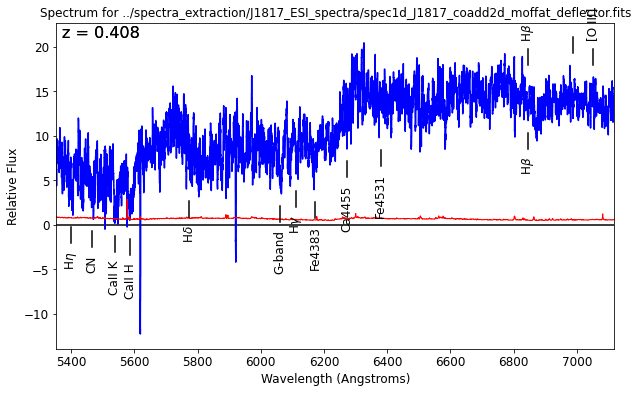

In [152]:
#%matplotlib notebook
fg = plt.figure(figsize=(10,6))
spec.smooth(9, fig=fg)
spec.mark_lines('abs', z=0.408, usesmooth=True)
spec.mark_lines('strongem', z=0.408, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389932 km/s


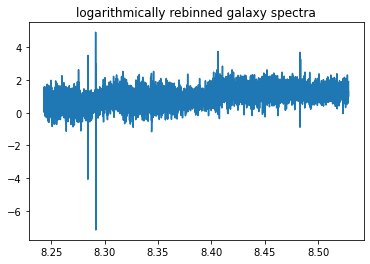

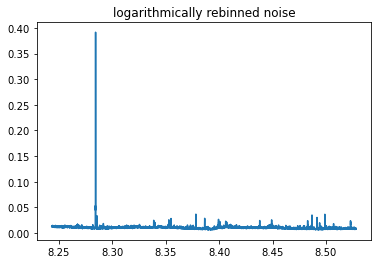

In [153]:
spec.cal_parm(z=0.408, high_z=True, logscale=True, veldis_start=250, noise_scale=0.01)

In [155]:
temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)# temp_num=500,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -27860.141136 

sigma_diff : 1.809456


In [229]:
mask_reg = np.log(np.array([ (5573, 5580), (5614, 5625), (6210, 6340),
                            (5660, 5780), (6820, 6910)
                              ])/1.408)
print(mask_reg)
#(6076, 6091), (6286, 6341), , (6858, 6925), (5420, 5430), (5916, 5930), (6801, 6809)
#, (7585, 7785), (7957, 7968), (8191, 8214), (8278, 8286) , 

[[8.28351853 8.2847738 ]
 [8.2908485  8.29280597]
 [8.39174592 8.41246379]
 [8.29900891 8.3199887 ]
 [8.48544449 8.49855466]]



degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       -14       193
chi2/DOF: 2025.; degree = 4; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       -15       194
chi2/DOF: 2025.; degree = 5; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       -14       191
chi2/DOF: 2025.; degree = 6; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1267

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       -14       194
chi2/DOF: 2025.; degree = 7; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1267

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       -10 

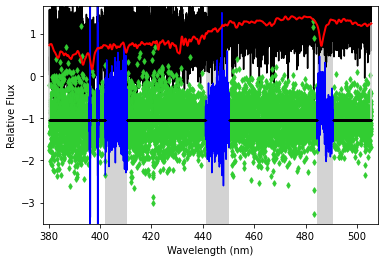

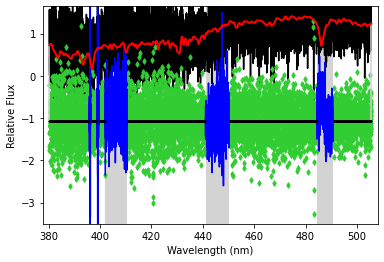

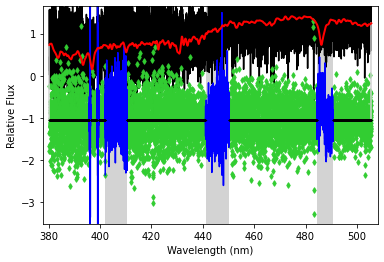

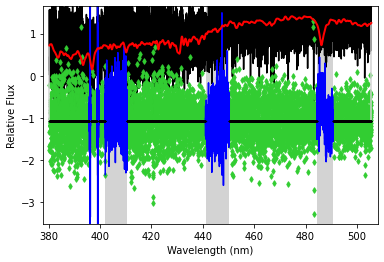

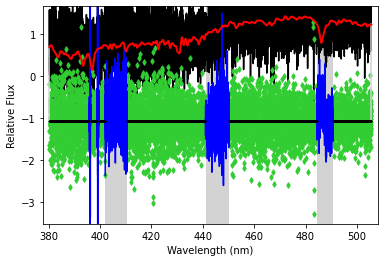

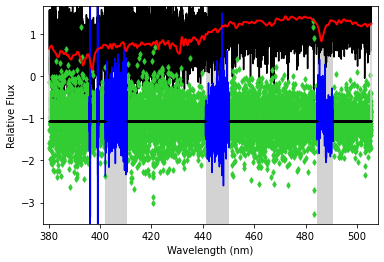

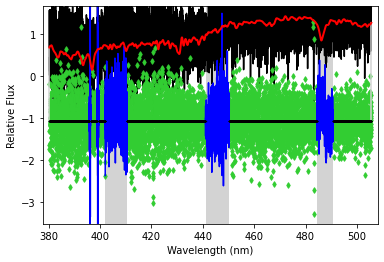

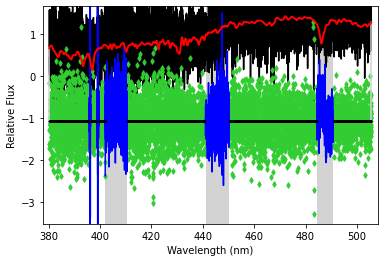

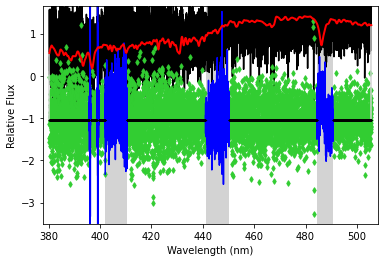

<Figure size 432x288 with 0 Axes>

In [230]:
spec.cal_veldis(temp_spec=temp_spec, degree=[4, 13], mask_reg=mask_reg, show_weight=True, moments=2)

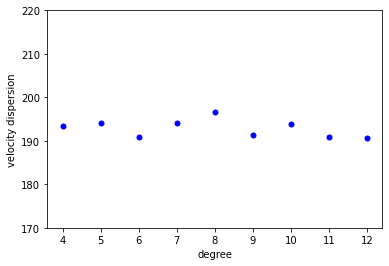

In [232]:
spec.plot_veldis(ylim=[170, 220])

order : 10


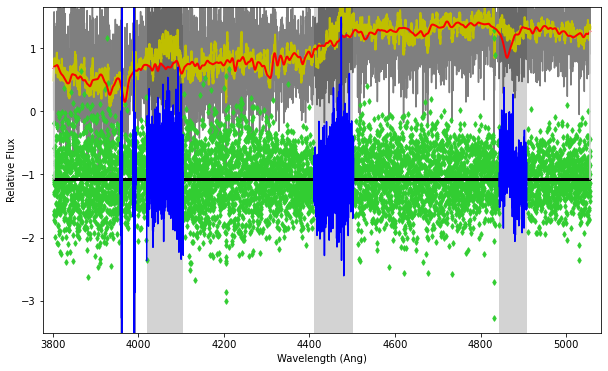

In [233]:
ord_list = np.array([10])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

In [66]:
spec_b = Veldis('../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[4300, 9400])


Reading spectrum from ../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  5353.84
 Spectrum End:     6498.29
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.22




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       5399.68
CN bandhd     3883.00       5467.26
CaII K        3933.67       5538.61
CaII H        3968.47       5587.61
H-delta       4101.00       5774.21
G-band        4305.00       6061.44
H-gamma       4340.00       6110.72
Fe4383        4383.00       6171.26
Ca4455        4455.00       6272.64
Fe4531        4531.00       6379.65


Line        lambda_rest  lambda_obs
----------  -----------  -----------


No lines of the requested type within the wavelength
 range covered by this spectrum.



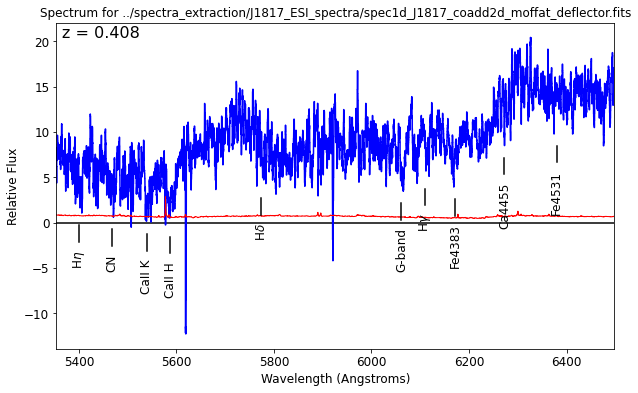

In [67]:
fg = plt.figure(figsize=(10,6))
spec_b.smooth(9, fig=fg)
spec_b.mark_lines('abs', z=0.408, usesmooth=True)
spec_b.mark_lines('strongem', z=0.408, usesmooth=True)


The wavelength is already red shifted once. Watch out!!!
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389925 km/s


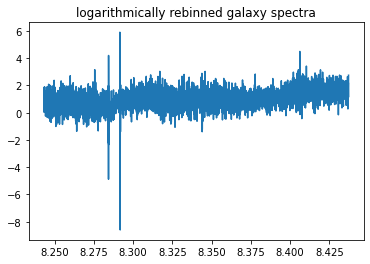

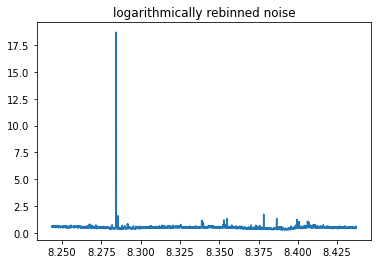

In [80]:
spec_b.cal_parm(z=0.408, high_z=True, logscale=True, veldis_start=250, noise_scale=0.5)

In [83]:
temp_spec_b = spec_b.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3) #,  temp_num=300)#,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -27860.141136 

sigma_diff : 1.809456


In [186]:
mask_reg_b = np.log(np.array([ (5573, 5580), (5614, 5625), (5644, 5800), 
                              (5916, 5930), (6210, 6340)
                              ])/1.408)
print(mask_reg_b)
#(6801, 6809) (5644, 5800), (5916, 5930),(6235, 6355) (6276, 6391) (5420, 5430),(5660, 5780)

[[8.28351853 8.2847738 ]
 [8.2908485  8.29280597]
 [8.29617806 8.32344294]
 [8.34324557 8.34560923]
 [8.39174592 8.41246379]]



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:        10       180
chi2/DOF: 1.285; degree = 2; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:        -8       193
chi2/DOF: 1.282; degree = 3; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       -11       192
chi2/DOF: 1.281; degree = 4; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       -13       183
chi2/DOF: 1.280; degree = 5; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       -26 

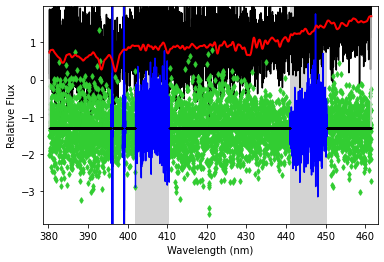

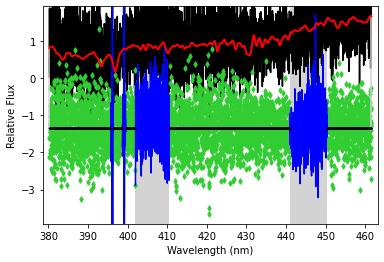

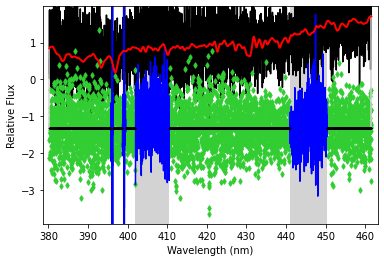

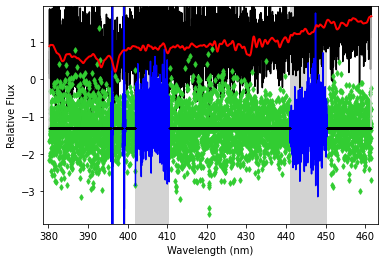

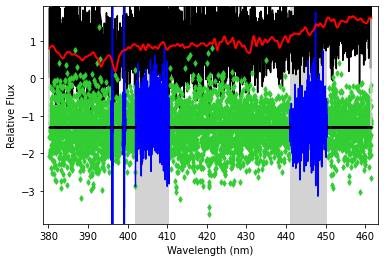

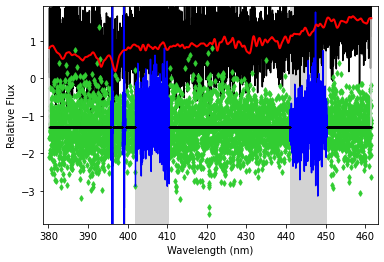

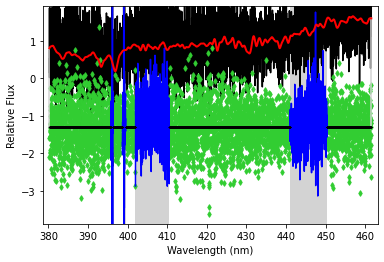

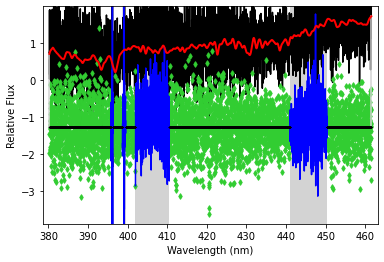

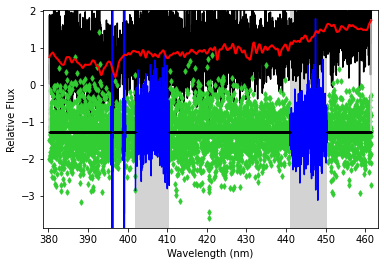

<Figure size 432x288 with 0 Axes>

In [234]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[2, 11], mask_reg=mask_reg, show_weight=True, moments=2)

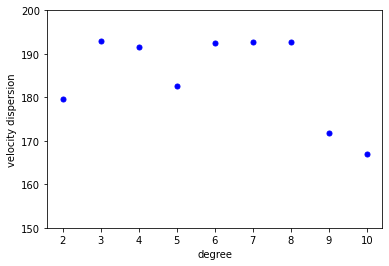

In [235]:
spec_b.plot_veldis(ylim=[150, 200])

order : 7


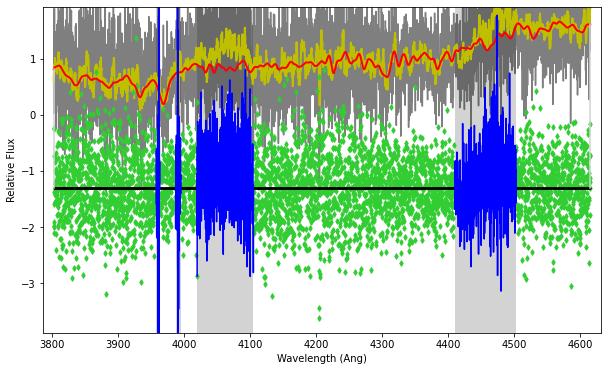

In [213]:
ord_list = np.array([7])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_b.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

In [218]:
spec_r = Veldis('../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[7300, 11800])


Reading spectrum from ../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  6000.20
 Spectrum End:     7118.67
 Dispersion (1st pixel):   0.23
 Dispersion (average):      0.25




Line        lambda_rest  lambda_obs
----------  -----------  -----------
G-band        4305.00       6061.44
H-gamma       4340.00       6110.72
Fe4383        4383.00       6171.26
Ca4455        4455.00       6272.64
Fe4531        4531.00       6379.65
H-beta        4861.00       6844.29


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       6844.29
[O III]       4962.00       6986.50
[O III]       5007.00       7049.86



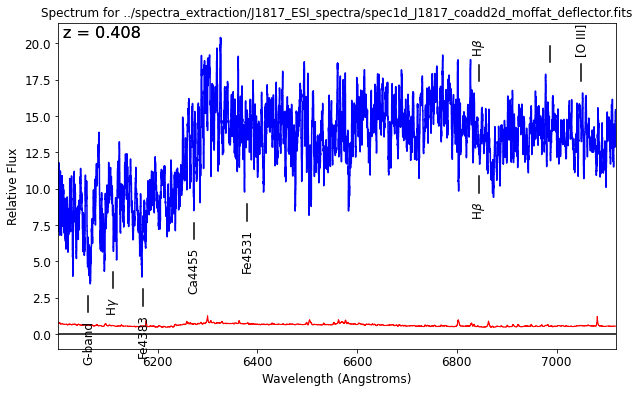

In [219]:
fg = plt.figure(figsize=(10,6))
spec_r.smooth(9, fig=fg)
spec_r.mark_lines('abs', z=0.408, usesmooth=True)
spec_r.mark_lines('strongem', z=0.408, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389923 km/s


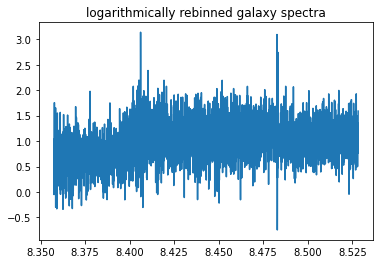

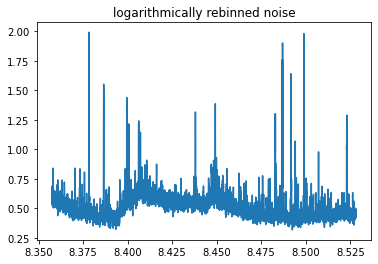

In [220]:
spec_r.cal_parm(z=0.408, high_z=True, logscale=True, veldis_start=250, noise_scale=0.5)

In [221]:
temp_spec_r = spec_r.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)# temp_num=500,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -62029.874553 

sigma_diff : 1.809456


In [137]:
mask_reg1 = np.log(np.array([ (5573, 5580), (5614, 5625), (6276, 6391), (5660, 5780), (6858, 6925),
                             (7250, 7320)
                              ])/1.408)
print(mask_reg1)

[[8.28351853 8.2847738 ]
 [8.2908485  8.29280597]
 [8.40231786 8.42047577]
 [8.29900891 8.3199887 ]
 [8.49100088 8.50072307]
 [8.54658649 8.55619535]]



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       -39       216
chi2/DOF: 0.4711; degree = 2; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       -42       218
chi2/DOF: 0.4710; degree = 3; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       -26       207
chi2/DOF: 0.4701; degree = 4; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  7 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       -28       204
chi2/DOF: 0.4698; degree = 5; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  8 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       -2

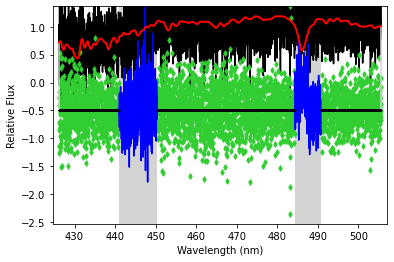

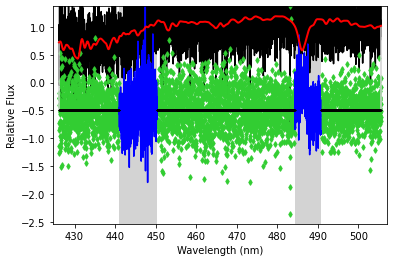

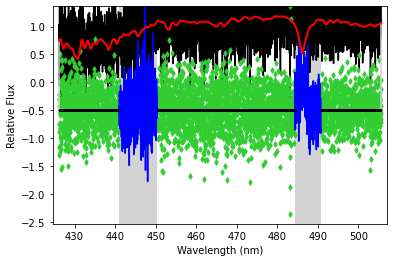

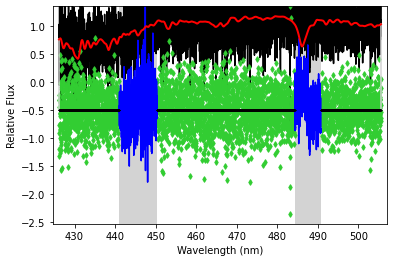

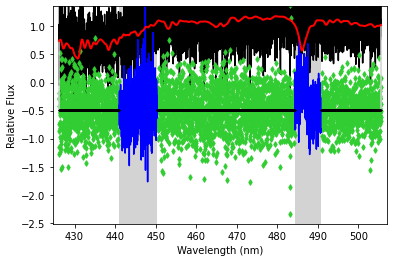

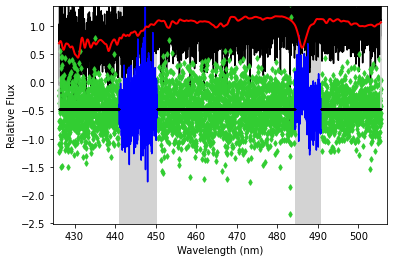

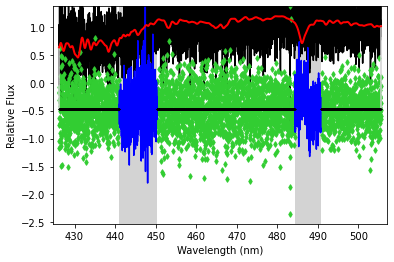

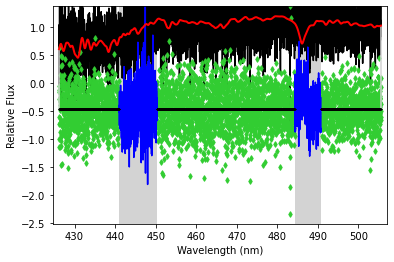

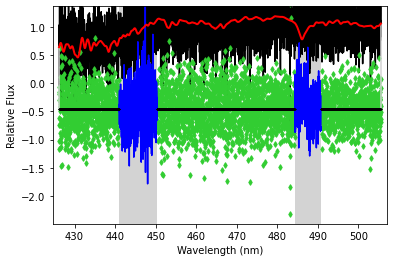

<Figure size 432x288 with 0 Axes>

In [236]:
spec_r.cal_veldis(temp_spec=temp_spec_r, degree=[2, 11], mask_reg=mask_reg, show_weight=True, moments=2)

order : 7


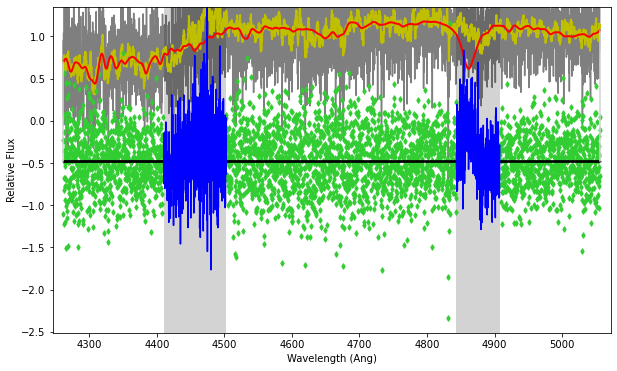

In [237]:
ord_list = np.array([7])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_r.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

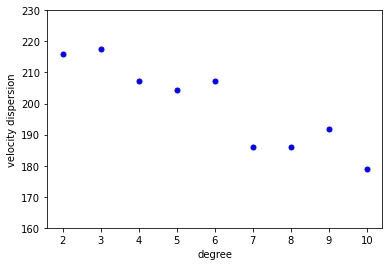

In [238]:
spec_r.plot_veldis(ylim=[160, 230])

# Results

## Systematic uncertainty

### Systematic uncertainty is calculated by changing wavelength range used to fit for velocity dispersion, degree of additive polynomial and template set. There are three choice for wavelength range- full spectrum, blue side and red side.

In [239]:
veldis_array = []
discard_veldis = []

In [240]:
## full spectrum

addtive_deg_full = np.arange(4, 13)

for d in addtive_deg_full:
    for i in range(11):
        temp_choice = np.random.choice(temp_spec.shape[1], size=600, replace=False)
        spec.cal_veldis(temp_spec=temp_spec[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec.vel_dis[0])
        else:
            veldis_array.append(spec.vel_dis[0])
            
print(len(veldis_array), len(discard_veldis))


degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11


In [241]:
## blue side
addtive_deg_b = np.arange(2, 9)

for d in addtive_deg_b:
    for i in range(15):
        temp_choice = np.random.choice(temp_spec_b.shape[1], size=600, replace=False)
        spec_b.cal_veldis(temp_spec=temp_spec_b[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_b.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_b.vel_dis[0])
        else:
            veldis_array.append(spec_b.vel_dis[0])
            
print(len(veldis_array), len(discard_veldis))


degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

deg

In [242]:
## red side
addtive_deg_r = np.arange(2, 9)

for d in addtive_deg_r:
    for i in range(15):
        temp_choice = np.random.choice(temp_spec_r.shape[1], size=600, replace=False)
        spec_r.cal_veldis(temp_spec=temp_spec_r[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_r.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_r.vel_dis[0])
        else:
            veldis_array.append(spec_r.vel_dis[0])
            
print(len(veldis_array), len(discard_veldis))


degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

deg

(array([ 6.,  8., 13., 15., 42., 40., 29., 10., 16., 12., 25., 24., 14.,
        10.,  9.,  9.,  7., 12.,  6.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([165.21382798, 170.05556035, 174.89729272, 179.73902509,
        184.58075746, 189.42248983, 194.26422221, 199.10595458,
        203.94768695, 208.78941932, 213.63115169, 218.47288406,
        223.31461643, 228.1563488 , 232.99808117, 237.83981354,
        242.68154591, 247.52327828, 252.36501066, 257.20674303,
        262.0484754 , 266.89020777, 271.73194014, 276.57367251,
        281.41540488, 286.25713725]),
 <BarContainer object of 25 artists>)

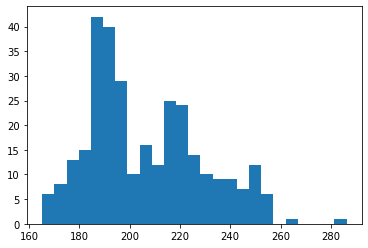

In [243]:
plt.hist(veldis_array, bins=25)

## Measured systematic uncertainty

In [244]:
print('systematic uncertainty for population : %d km/s' % int(np.std(veldis_array)))
print('systematic uncertainty for sample : %d km/s' % int(np.std(veldis_array, ddof=1)))

systematic uncertainty for population : 22 km/s
systematic uncertainty for sample : 22 km/s


In [245]:
print('mean velocity dispersion : %d km/s' % int(np.mean(veldis_array)))

mean velocity dispersion : 206 km/s


In [251]:
np.savetxt('J1817_systematic_veldis.txt', np.array(veldis_array), fmt='%f')

## The velocity dispersion value that to be reported is measured using all templates and additive polynomial with degree 7. The degree of the polynomial is decided based on the length of the spectrum which in this case around 2000Ang.


degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       -14       194
chi2/DOF: 2025.; degree = 7; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1267


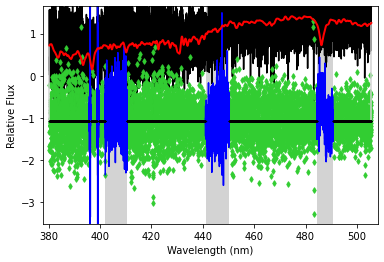

<Figure size 432x288 with 0 Axes>

In [246]:
spec.cal_veldis(temp_spec=temp_spec, degree=[7, 8], mask_reg=mask_reg, show_weight=True, moments=2)

In [247]:
spec.cal_sis_veldis(0.9, 0.408, 3.07)


velocity dispersion assuming SIS mass profile is 203.432198


<Quantity 203.43219825>

### store best fit data and good pixel values for future use

In [248]:
gdpix = np.pad(spec.goodpixels[0], (0, len(spec.best_fit[0])- len(spec.goodpixels[0])))
np.savetxt('J1817_bestfit_veldis.txt', np.array([spec.best_fit[0], gdpix]), fmt='%f')

In [249]:
fit_data = np.loadtxt('J1817_bestfit_veldis.txt')

5572.7941343938055 5580.209446915092
5613.8072880266 5625.122698839104
5659.851023504777 5780.022113917609
6209.855578728715 6340.018132967054
6819.7821210226 6910.023112588069


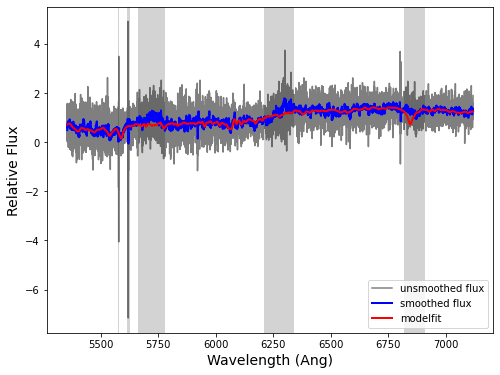

In [250]:
plt.figure(figsize=(8,6))
boxsize=15
x = np.exp(spec.wav_rebinned)*1.408
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
plt.xlabel(r"Wavelength (Ang)", fontsize=14)
plt.ylabel("Relative Flux", fontsize=14)
plt.plot(x, gal_rebinn['flux'], color='k', label='unsmoothed flux', alpha=0.5)
plt.plot(x, gal_smooth, color='b', linewidth=2, label='smoothed flux')
plt.plot(x, bst, 'r', linewidth=2, label='modelfit')
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    print(x[a], x[b])
    plt.axvspan(x[a], x[b], facecolor='lightgray')
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
    
# If the span is two thin than the function doesn't plot it visbly. So increased the span manually.
#plt.axvspan(5570, 5580, facecolor='lightgray')
plt.legend()

## Check what is velocity dispersion if the rest wavelength region from 4200-4800 Ang and 5090-5450 Ang are used as Matt suggested.

In [255]:
spec_new = Veldis('../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True)#13000


Reading spectrum from ../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  4546.90
 Spectrum End:    10075.69
 Dispersion (1st pixel):   0.17
 Dispersion (average):      0.26



In [256]:
spec_new.closest_wavelength(np.array([[4200, 4800], [5090, 5450]])*1.408)


Given waverange(assumed) : 

5913.599999999999 6758.4
7166.719999999999 7673.599999999999

Closest waverange to the given ones : 

5913.519047296086 6758.39389697147
7166.7045353229905 7673.667901280684


([(5913.519047296086, 6758.39389697147),
  (7166.7045353229905, 7673.667901280684)],
 [(6917, 10432), (11976, 13775)])

In [257]:
spec1 = Veldis('../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[6915, 10435])


Reading spectrum from ../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  5913.07
 Spectrum End:     6758.91
 Dispersion (1st pixel):   0.22
 Dispersion (average):      0.24




Line        lambda_rest  lambda_obs
----------  -----------  -----------
G-band        4305.00       6061.44
H-gamma       4340.00       6110.72
Fe4383        4383.00       6171.26
Ca4455        4455.00       6272.64
Fe4531        4531.00       6379.65


Line        lambda_rest  lambda_obs
----------  -----------  -----------


No lines of the requested type within the wavelength
 range covered by this spectrum.



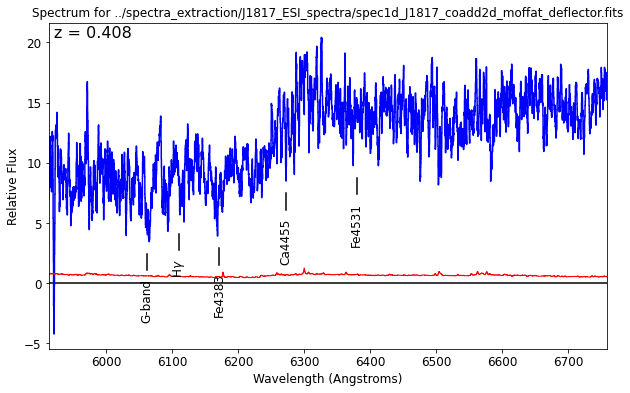

In [260]:
fg = plt.figure(figsize=(10,6))
spec1.smooth(9, fig=fg)
spec1.mark_lines('abs', z=0.408, usesmooth=True)
spec1.mark_lines('strongem', z=0.408, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389921 km/s


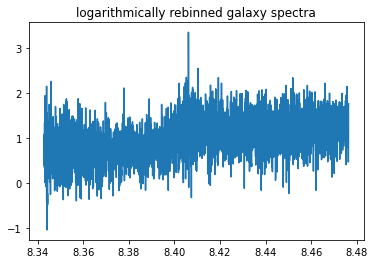

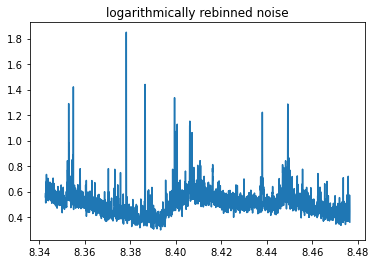

In [262]:
spec1.cal_parm(z=0.408, high_z=True, logscale=True, veldis_start=250, noise_scale=0.5)

In [263]:
temp_spec1 = spec1.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)# temp_num=500,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -57644.758765 

sigma_diff : 1.809456



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       -43       182
chi2/DOF: 0.6478; degree = 2; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       -36       188
chi2/DOF: 0.6478; degree = 3; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       -44       184
chi2/DOF: 0.6478; degree = 4; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       -43       172
chi2/DOF: 0.6438; degree = 5; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

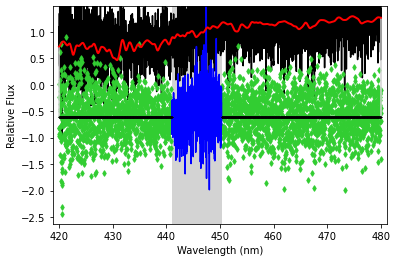

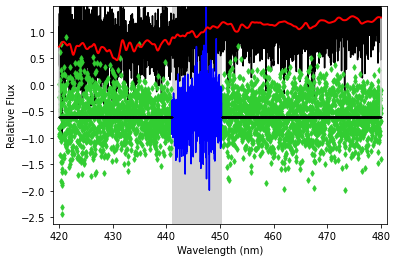

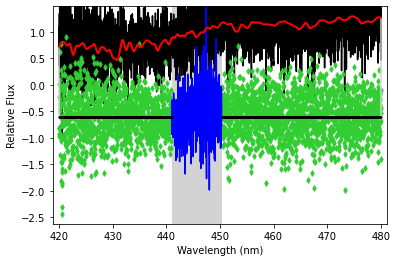

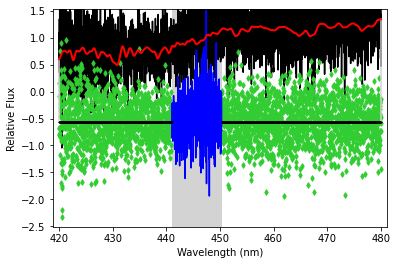

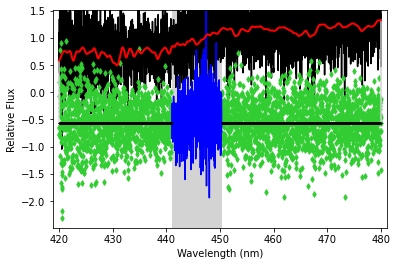

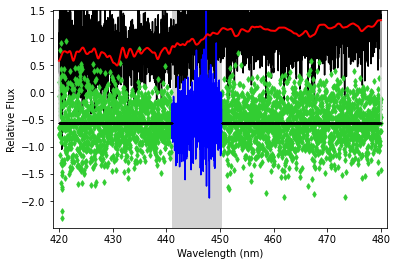

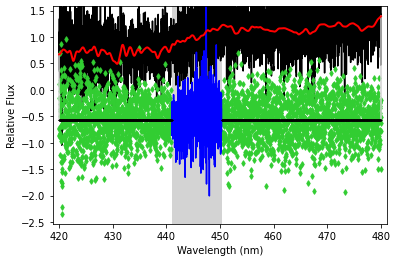

<Figure size 432x288 with 0 Axes>

In [264]:
spec1.cal_veldis(temp_spec=temp_spec1, degree=[2, 9], mask_reg=mask_reg, show_weight=True, moments=2)

order : 7


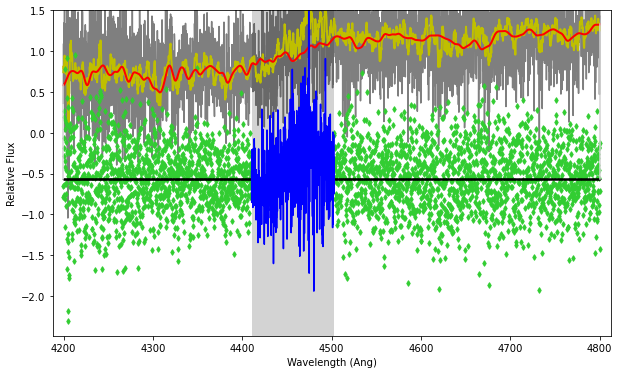

In [265]:
ord_list = np.array([7])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec1.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

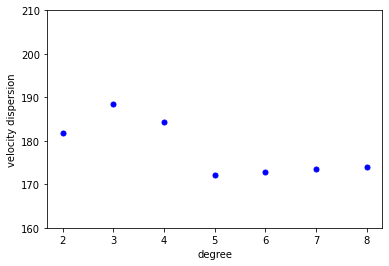

In [266]:
spec1.plot_veldis(ylim=[160,210])

In [258]:
spec2 = Veldis('../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[11975, 13775])


Reading spectrum from ../spectra_extraction/J1817_ESI_spectra/spec1d_J1817_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  7166.43
 Spectrum End:     7673.38
 Dispersion (1st pixel):   0.27
 Dispersion (average):      0.28




Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg I (b)      5176.00       7287.81


Line        lambda_rest  lambda_obs
----------  -----------  -----------


No lines of the requested type within the wavelength
 range covered by this spectrum.



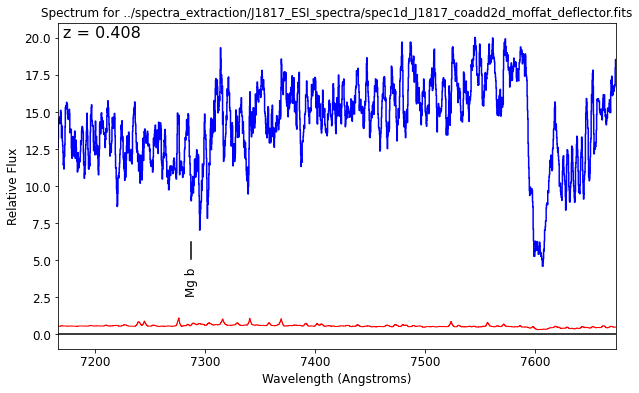

In [261]:
fg = plt.figure(figsize=(10,6))
spec2.smooth(9, fig=fg)
spec2.mark_lines('abs', z=0.408, usesmooth=True)
spec2.mark_lines('strongem', z=0.408, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389916 km/s


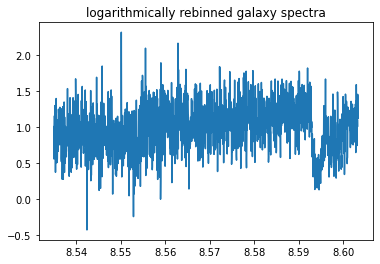

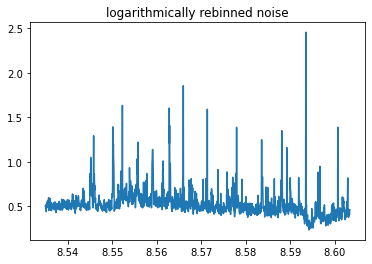

In [267]:
spec2.cal_parm(z=0.408, high_z=True, logscale=True, veldis_start=250, noise_scale=0.5)

In [268]:
temp_spec2 = spec2.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)# temp_num=500,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -115277.709128 

sigma_diff : 1.809456


In [272]:
mask_reg2 = np.log(np.array([ (5573, 5580), (5614, 5625), (6210, 6340),
                            (5660, 5780), (6820, 6910), (7560, 7700)
                              ])/1.408)


degree : 2
 Best Fit:       Vel     sigma
 comp.  0:        94       331
chi2/DOF: 0.2829; degree = 2; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 20; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       220       147
chi2/DOF: 0.2821; degree = 3; mdegree = 0
method = capfit; Jac calls: 21; Func calls: 65; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       229       131
chi2/DOF: 0.2818; degree = 4; mdegree = 0
method = capfit; Jac calls: 21; Func calls: 65; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       160       265
chi2/DOF: 0.2817; degree = 5; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 29; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1267
772, 15.823779
873, 10.931169

degree : 6
 Best Fit:  

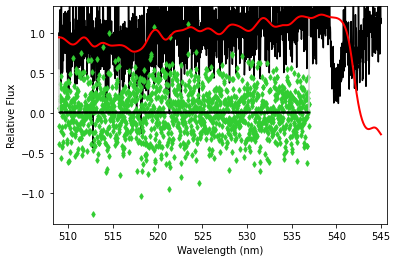

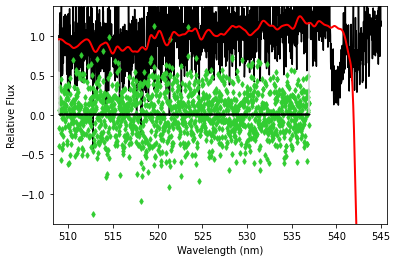

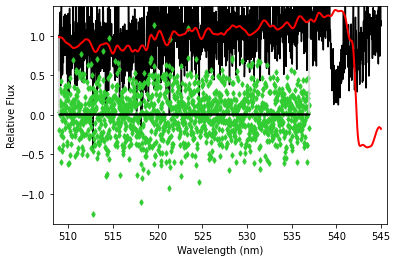

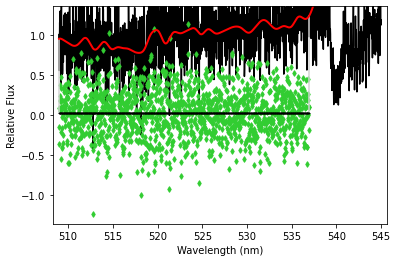

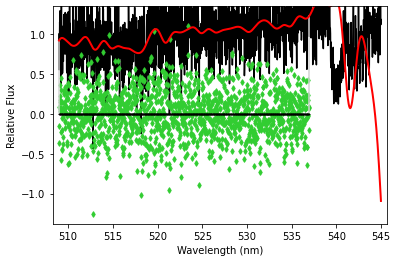

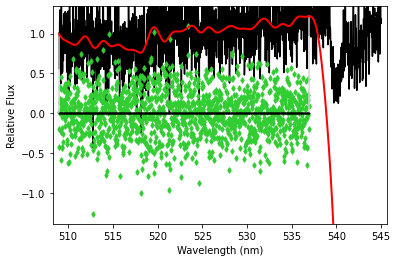

<Figure size 432x288 with 0 Axes>

In [274]:
spec2.cal_veldis(temp_spec=temp_spec2, degree=[2, 8], mask_reg=mask_reg2, show_weight=True, moments=2)